# Basic Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
cd C:\Users\anime\OneDrive\Desktop\Accredian

C:\Users\anime\OneDrive\Desktop\Accredian


# Reading the Data

In [29]:
df = pd.read_csv("Fraud.csv")
df.sample(5)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
1911499,166,CASH_OUT,82627.88,C2002524922,204988.00,122360.12,C1304185995,12958.41,95586.29,0,0
217969,13,CASH_OUT,314034.72,C208175889,15876.47,0.00,C1325038895,7560556.70,7874591.42,0,0
3890012,284,TRANSFER,283248.93,C1150017112,30209.00,0.00,C367771917,0.00,283248.93,0,0
6331043,690,CASH_OUT,157711.50,C1328783515,91800.00,0.00,C66094477,0.00,157711.50,0,0
5368957,376,TRANSFER,668189.10,C401705377,0.00,0.00,C356156042,5634066.92,6302256.01,0,0


# Data Pre-Processing

In [30]:
df.drop(['step', 'nameOrig', 'newbalanceOrig', 'nameDest', 'newbalanceDest'], axis = 1, inplace = True)

Columns step, nameDest, nameOrig, newbalanceOrig and newbalanceDestare are removed because steps and name are non essential for a predictive model and newbalance doesn't add any new information to the data.

In [31]:
df.isnull().sum() 

type              0
amount            0
oldbalanceOrg     0
oldbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

There are No Null values 

In [32]:
for col in df:                             
    print(f'{col}: {df[col].unique()}')

type: ['PAYMENT' 'TRANSFER' 'CASH_OUT' 'DEBIT' 'CASH_IN']
amount: [9.83964000e+03 1.86428000e+03 1.81000000e+02 ... 3.39682130e+05
 6.31140928e+06 8.50002520e+05]
oldbalanceOrg: [1.70136000e+05 2.12490000e+04 1.81000000e+02 ... 3.39682130e+05
 6.31140928e+06 8.50002520e+05]
oldbalanceDest: [      0.     21182.     41898.   ...  503464.5    68488.84 6510099.11]
isFraud: [0 1]
isFlaggedFraud: [0 1]


All unique values in the dataset

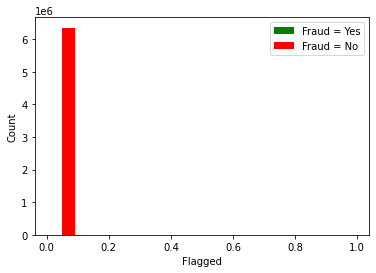

In [61]:
fraud_no = df[df.isFraud == 0].isFlaggedFraud
fraud_yes = df[df.isFraud == 1].isFlaggedFraud

plt.xlabel("Flagged")
plt.ylabel("Count")

plt.hist([fraud_yes, fraud_no], color = ['green', 'red'], label = ['Fraud = Yes', 'Fraud = No'])
plt.legend()

This correlation plot indicates a heavy imbalance in the dataset

In [34]:
df.isFraud.value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

The dataset is indeed heavily imbalanced

In [35]:
X = df.drop(['isFraud'], axis = 1)
y = df['isFraud']

In [36]:
X.shape

(6362620, 5)

In [37]:
y.shape

(6362620,)

In [44]:
from imblearn.under_sampling import RandomUnderSampler
under_sampler = RandomUnderSampler()
X_res, y_res = under_sampler.fit_resample(X, y)

Resampling the under sampled data.

In [45]:
X_res.shape

(16426, 5)

In [46]:
y_res.shape

(16426,)

In [47]:
dummies = pd.get_dummies(X_res.type)
X_res = pd.concat([X_res, dummies], axis = 'columns')
X_res.drop(['type','PAYMENT'], axis = 1 , inplace = True)

One Hot Encoding for the 'type' column(object)

In [48]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size = 0.1, random_state = 42)

Splitting the data : Train - 90 % and
                     Test - 10 %

# XGBoost

In [49]:
from xgboost import XGBClassifier
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [50]:
model_xgb.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0])

In [51]:
model_xgb.score(X_test, y_test)

0.9933049300060864

# CatBoost

In [55]:
from catboost import CatBoostClassifier
model_cat = CatBoostClassifier()
model_cat.fit(X_train, y_train)

Learning rate set to 0.03254
0:	learn: 0.6259606	total: 173ms	remaining: 2m 52s
1:	learn: 0.5658952	total: 180ms	remaining: 1m 30s
2:	learn: 0.5184622	total: 188ms	remaining: 1m 2s
3:	learn: 0.4773195	total: 196ms	remaining: 48.9s
4:	learn: 0.4405680	total: 205ms	remaining: 40.8s
5:	learn: 0.4040176	total: 212ms	remaining: 35.1s
6:	learn: 0.3759626	total: 221ms	remaining: 31.3s
7:	learn: 0.3492406	total: 228ms	remaining: 28.2s
8:	learn: 0.3265899	total: 235ms	remaining: 25.9s
9:	learn: 0.3056019	total: 242ms	remaining: 24s
10:	learn: 0.2885342	total: 249ms	remaining: 22.4s
11:	learn: 0.2702618	total: 256ms	remaining: 21.1s
12:	learn: 0.2567809	total: 262ms	remaining: 19.9s
13:	learn: 0.2410728	total: 269ms	remaining: 19s
14:	learn: 0.2302531	total: 275ms	remaining: 18.1s
15:	learn: 0.2173768	total: 282ms	remaining: 17.3s
16:	learn: 0.2086128	total: 288ms	remaining: 16.7s
17:	learn: 0.1966028	total: 294ms	remaining: 16.1s
18:	learn: 0.1891155	total: 301ms	remaining: 15.5s
19:	learn: 0.1

168:	learn: 0.0475017	total: 1.48s	remaining: 7.29s
169:	learn: 0.0470982	total: 1.49s	remaining: 7.27s
170:	learn: 0.0470825	total: 1.5s	remaining: 7.26s
171:	learn: 0.0469995	total: 1.5s	remaining: 7.25s
172:	learn: 0.0468442	total: 1.51s	remaining: 7.23s
173:	learn: 0.0468013	total: 1.52s	remaining: 7.22s
174:	learn: 0.0465034	total: 1.53s	remaining: 7.21s
175:	learn: 0.0464469	total: 1.54s	remaining: 7.19s
176:	learn: 0.0464042	total: 1.54s	remaining: 7.18s
177:	learn: 0.0460760	total: 1.55s	remaining: 7.16s
178:	learn: 0.0459628	total: 1.56s	remaining: 7.14s
179:	learn: 0.0458348	total: 1.56s	remaining: 7.13s
180:	learn: 0.0458161	total: 1.57s	remaining: 7.11s
181:	learn: 0.0455943	total: 1.58s	remaining: 7.1s
182:	learn: 0.0454420	total: 1.59s	remaining: 7.08s
183:	learn: 0.0454158	total: 1.59s	remaining: 7.07s
184:	learn: 0.0453198	total: 1.6s	remaining: 7.06s
185:	learn: 0.0451950	total: 1.61s	remaining: 7.05s
186:	learn: 0.0451625	total: 1.62s	remaining: 7.04s
187:	learn: 0.04

337:	learn: 0.0347047	total: 2.75s	remaining: 5.38s
338:	learn: 0.0346590	total: 2.75s	remaining: 5.37s
339:	learn: 0.0346322	total: 2.76s	remaining: 5.36s
340:	learn: 0.0346074	total: 2.77s	remaining: 5.35s
341:	learn: 0.0345779	total: 2.78s	remaining: 5.34s
342:	learn: 0.0344839	total: 2.79s	remaining: 5.33s
343:	learn: 0.0344675	total: 2.79s	remaining: 5.33s
344:	learn: 0.0344126	total: 2.8s	remaining: 5.32s
345:	learn: 0.0343301	total: 2.81s	remaining: 5.31s
346:	learn: 0.0342852	total: 2.82s	remaining: 5.3s
347:	learn: 0.0342616	total: 2.82s	remaining: 5.29s
348:	learn: 0.0342318	total: 2.83s	remaining: 5.28s
349:	learn: 0.0341863	total: 2.84s	remaining: 5.27s
350:	learn: 0.0341726	total: 2.85s	remaining: 5.26s
351:	learn: 0.0341620	total: 2.85s	remaining: 5.25s
352:	learn: 0.0341525	total: 2.86s	remaining: 5.24s
353:	learn: 0.0341391	total: 2.87s	remaining: 5.24s
354:	learn: 0.0341187	total: 2.88s	remaining: 5.22s
355:	learn: 0.0340654	total: 2.88s	remaining: 5.21s
356:	learn: 0.

503:	learn: 0.0290546	total: 4.01s	remaining: 3.95s
504:	learn: 0.0290279	total: 4.02s	remaining: 3.94s
505:	learn: 0.0289534	total: 4.03s	remaining: 3.93s
506:	learn: 0.0288894	total: 4.03s	remaining: 3.92s
507:	learn: 0.0288371	total: 4.04s	remaining: 3.91s
508:	learn: 0.0287881	total: 4.05s	remaining: 3.9s
509:	learn: 0.0287792	total: 4.05s	remaining: 3.9s
510:	learn: 0.0287725	total: 4.06s	remaining: 3.89s
511:	learn: 0.0287188	total: 4.07s	remaining: 3.88s
512:	learn: 0.0287068	total: 4.08s	remaining: 3.87s
513:	learn: 0.0286898	total: 4.08s	remaining: 3.86s
514:	learn: 0.0286783	total: 4.09s	remaining: 3.85s
515:	learn: 0.0286658	total: 4.1s	remaining: 3.84s
516:	learn: 0.0285861	total: 4.1s	remaining: 3.83s
517:	learn: 0.0285746	total: 4.11s	remaining: 3.83s
518:	learn: 0.0285624	total: 4.12s	remaining: 3.82s
519:	learn: 0.0285269	total: 4.13s	remaining: 3.81s
520:	learn: 0.0285104	total: 4.13s	remaining: 3.8s
521:	learn: 0.0285003	total: 4.14s	remaining: 3.79s
522:	learn: 0.028

686:	learn: 0.0245897	total: 5.28s	remaining: 2.41s
687:	learn: 0.0245710	total: 5.29s	remaining: 2.4s
688:	learn: 0.0245131	total: 5.29s	remaining: 2.39s
689:	learn: 0.0244966	total: 5.3s	remaining: 2.38s
690:	learn: 0.0244860	total: 5.31s	remaining: 2.37s
691:	learn: 0.0244755	total: 5.31s	remaining: 2.37s
692:	learn: 0.0244687	total: 5.32s	remaining: 2.36s
693:	learn: 0.0244389	total: 5.33s	remaining: 2.35s
694:	learn: 0.0244077	total: 5.33s	remaining: 2.34s
695:	learn: 0.0244012	total: 5.34s	remaining: 2.33s
696:	learn: 0.0243877	total: 5.35s	remaining: 2.33s
697:	learn: 0.0243775	total: 5.36s	remaining: 2.32s
698:	learn: 0.0243313	total: 5.36s	remaining: 2.31s
699:	learn: 0.0243188	total: 5.37s	remaining: 2.3s
700:	learn: 0.0242939	total: 5.38s	remaining: 2.29s
701:	learn: 0.0242717	total: 5.38s	remaining: 2.28s
702:	learn: 0.0242616	total: 5.39s	remaining: 2.28s
703:	learn: 0.0242543	total: 5.39s	remaining: 2.27s
704:	learn: 0.0241857	total: 5.4s	remaining: 2.26s
705:	learn: 0.02

859:	learn: 0.0210644	total: 6.55s	remaining: 1.07s
860:	learn: 0.0210552	total: 6.56s	remaining: 1.06s
861:	learn: 0.0209966	total: 6.57s	remaining: 1.05s
862:	learn: 0.0209611	total: 6.58s	remaining: 1.04s
863:	learn: 0.0209543	total: 6.58s	remaining: 1.04s
864:	learn: 0.0209452	total: 6.59s	remaining: 1.03s
865:	learn: 0.0209155	total: 6.6s	remaining: 1.02s
866:	learn: 0.0209097	total: 6.61s	remaining: 1.01s
867:	learn: 0.0208764	total: 6.62s	remaining: 1.01s
868:	learn: 0.0208602	total: 6.63s	remaining: 999ms
869:	learn: 0.0208328	total: 6.63s	remaining: 991ms
870:	learn: 0.0208252	total: 6.64s	remaining: 984ms
871:	learn: 0.0208123	total: 6.65s	remaining: 976ms
872:	learn: 0.0208029	total: 6.66s	remaining: 969ms
873:	learn: 0.0207963	total: 6.67s	remaining: 961ms
874:	learn: 0.0207533	total: 6.68s	remaining: 954ms
875:	learn: 0.0207131	total: 6.68s	remaining: 946ms
876:	learn: 0.0206863	total: 6.69s	remaining: 939ms
877:	learn: 0.0206702	total: 6.7s	remaining: 931ms
878:	learn: 0.

In [56]:
model_cat.predict(X_test)

array([1, 1, 0, ..., 0, 1, 0], dtype=int64)

In [57]:
model_cat.score(X_test, y_test)

0.9939135727328059

# SVM

In [58]:
from sklearn.svm import SVC
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [59]:
model_svm.predict(X_test)

array([1, 0, 0, ..., 0, 1, 0], dtype=int64)

In [60]:
model_svm.score(X_test, y_test)

0.7894096165550821

# ANN

In [62]:
from sklearn.preprocessing import MinMaxScaler                         
cols2scale = ['amount', 'oldbalanceOrg', 'oldbalanceDest']
scaler = MinMaxScaler()

X_res[cols2scale] = scaler.fit_transform(X_res[cols2scale])

In [63]:
X_res

,amount,oldbalanceOrg,oldbalanceDest,isFlaggedFraud,CASH_IN,CASH_OUT,DEBIT,TRANSFER
556731,0.000159,0.000491,0.000000,0,0,0,0,0
5975284,0.000194,0.000361,0.000000,0,0,0,0,0
3488718,0.024261,0.000532,0.000000,0,0,0,0,1
1123343,0.000192,0.001407,0.000000,0,0,0,0,0
5427882,0.005264,0.000024,0.000078,0,0,0,0,1
...,...,...,...,...,...,...,...,...
6362615,0.015808,0.005701,0.000000,0,0,1,0,0
6362616,0.293713,0.105923,0.000000,0,0,0,0,1
6362617,0.293713,0.105923,0.000290,0,0,1,0,0
6362618,0.039556,0.014265,0.000000,0,0,0,0,1


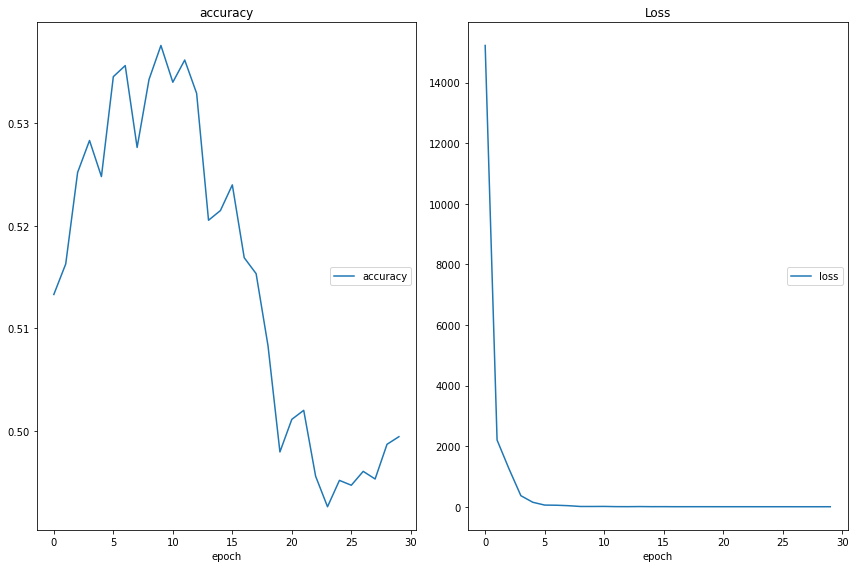

accuracy
	accuracy         	 (min:    0.493, max:    0.538, cur:    0.499)
Loss
	loss             	 (min:    0.725, max: 15225.170, cur:    0.809)


In [73]:
import tensorflow as tf
from tensorflow import keras
from keras.callbacks import ModelCheckpoint
from livelossplot import PlotLossesKeras
# import h5py

model = keras.Sequential(
[
    keras.layers.Dense(8, input_shape = (8,), activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(4, activation = 'relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(1, activation = 'sigmoid')
])

# opt = keras.optimizers.Adam(learning_rate=0.01)

mc_loss = ModelCheckpoint('Models/model1svd3.sav', monitor = 'accuracy', mode = 'max', save_best_only = True)

model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(X_train, y_train, batch_size = 32,epochs = 30, callbacks = [mc_loss, PlotLossesKeras()])

In [74]:
model.evaluate(X_test, y_test)

52/52 [==============================] - 0s 4ms/step - loss: 0.6930 - accuracy: 0.5082


[0.6930471062660217, 0.5082166790962219]

In [75]:
yp = model.predict(X_test)
y_pred = []
for element in yp:
    if element >= 0.498:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [76]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.51      1.00      0.67       835
           1       0.00      0.00      0.00       808

    accuracy                           0.51      1643
   macro avg       0.25      0.50      0.34      1643
weighted avg       0.26      0.51      0.34      1643



C:\Users\anime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\anime\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Now,
- It is evident that XGBoost/CatBoost performed the best in this data. Accuracy ~ 99.5%.<br> 
- We didn't check for outliers because in this type of dataset where huge amount of money equates to a higher chance of fraud. 
<br> 
- The key factors that determine a fraudulent transaction are the sum of money transferred compared to the old balance, low balance after big transaction.<br>
- Companies should put a cap on the maximum amount of transaction that can be done in a day (Already in effect). And when a big transaction needs to be done they should definitely have a backgroung check on the transaction because at the end of day the the fraud transactions not only affect the victim but also the bank the ultimately the country.